**Code and content creation**:

Lior (Leo) Ginzberg  
liorginz@google.com  
BigQuery Product Management  
AI Query Engine (AIQE)

--

***Please read the README file in this repo' and/or the Medium article in this link:
to get more context about the code sample in this file

In [1]:
!pip install bigquery_magics==0.8.1

In [ ]:
!gcloud auth application-default login


You are running on a Google Compute Engine virtual machine.
The service credentials associated with this virtual machine
will automatically be used by Application Default
Credentials, so it is not necessary to use this command.

If you decide to proceed anyway, your user credentials may be visible
to others with access to this virtual machine. Are you sure you want
to authenticate with your personal account?

Do you want to continue (Y/n)?  Y

Go to the following link in your browser, and complete the sign-in prompts:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fapplicationdefaultauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login&state=houyevgJdxJYzI8O5K1s7ZJVwwTuXz&prompt=consent&token_

In [ ]:
#Data Preperation. Extract 100 records from the month of December 2022
#This small subset isbeing used to limit the cost implications of
#this experiment. The below query can be changed to consider more / less
#records in the experiment

#%%bigquery is a cell magic command that allows to directly execute Google
#Standard SQL queries against BigQuery from within a code cell

%%bigquery

DROP TABLE IF EXISTS ai_generate_experiment.cycle_hire_december_2022;
CREATE TABLE IF NOT EXISTS ai_generate_experiment.cycle_hire_december_2022 AS
SELECT *
  FROM `ai_generate_experiment.cycle_hire`
 WHERE extract(YEAR from start_date) = 2022
      AND
       extract(MONTH from start_date) = 12
LIMIT 100;

**Context & Prerequisits:**

1. These code samples will use the BigQuery public dataset: London Bicycle Hires
2. Follow the next steps to get access to this dataset:  
  2.1 Open the GCP console  
  2.2 Open BigQuery  
  2.3 Navigate to

  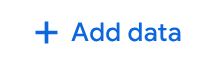

  2.4 Select "Public Datasets" on the left side of the menu

  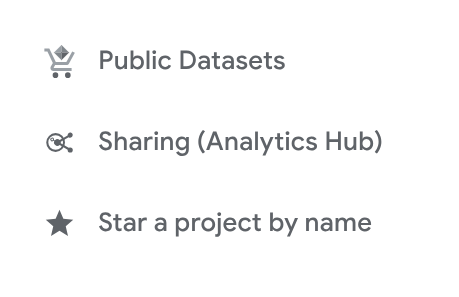

  2.5 Search for "London Bicycle Hires" and select the dataset from the search response

   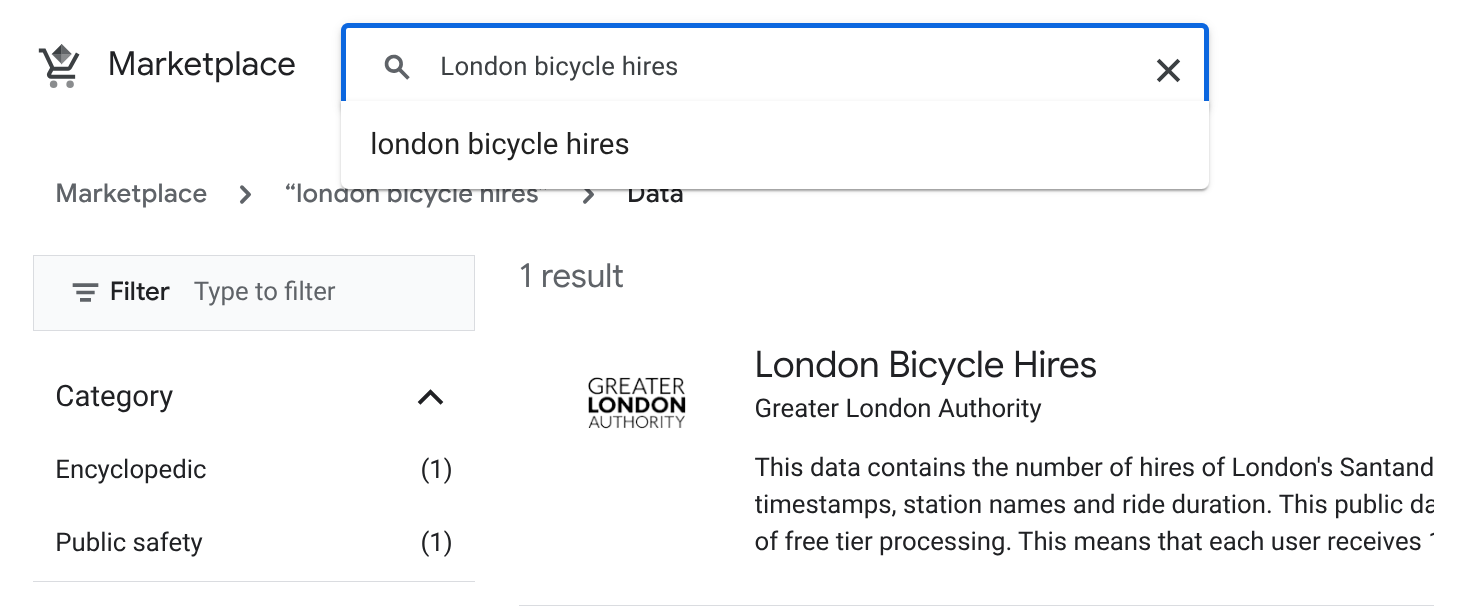

   2.6 Select "view dataset"

   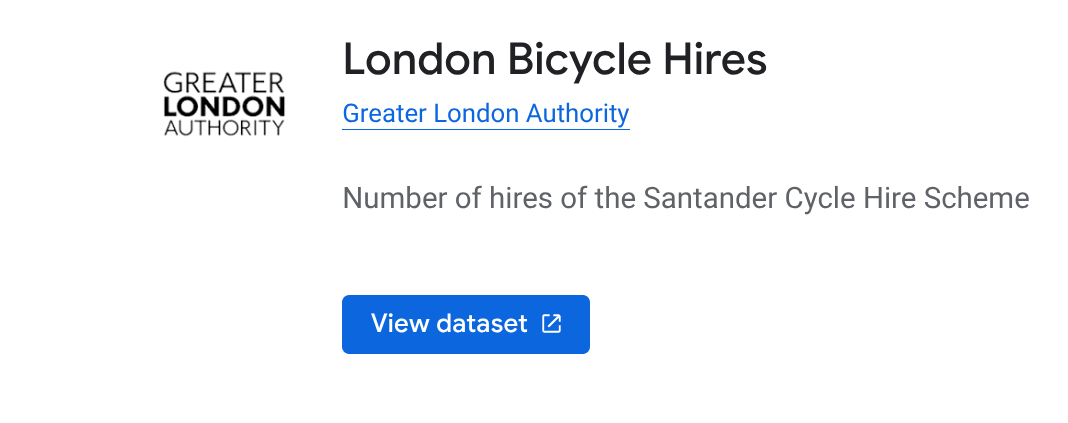

   2.7 In BigQuery Studio, you should now see a project by the name *bq-public-dataset*. Within this project you should see a dataset by the name *london_bicycles*

   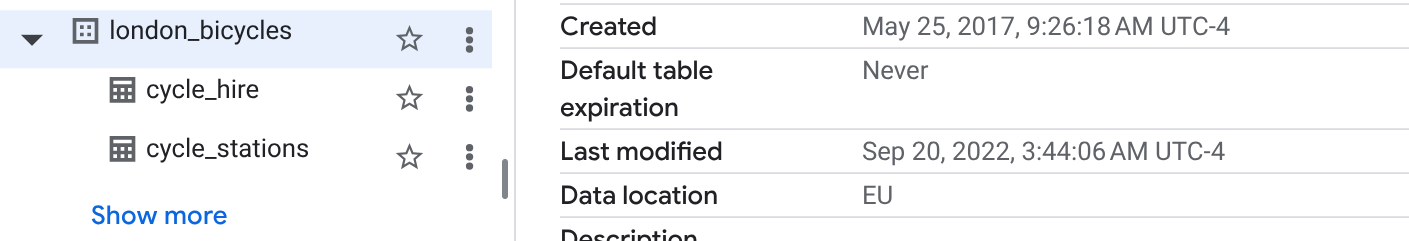

   2.8 The Dataset, and its respective two tables, are stored in the BigQuery EU multi-region

   2.9 Create a copy of the dataset in your project so that you can have more control over the data. When creating the copy, please consider if you want the dataset to be copied to a dataset in the EU, US or any other region / multi-region. It is recommended to keep the data in the same region that your slots / compute are.

   Use the "Copy" option and follow the instructions. To easily follow the code samples in this notebook,name your destination dataset: ai_generate_experiment  

   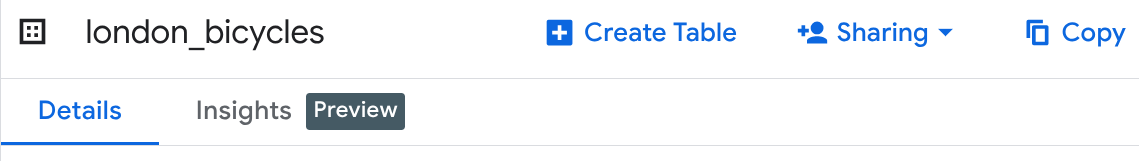

   2.10 Open the cycle_hire table from the ai_generate_experiment dataset. As you can see the table is relatively large. It has 83M+ records and ~9.5GB. In the next steps we will create a small subset of this table so that we can manage our cost during the experimintation

   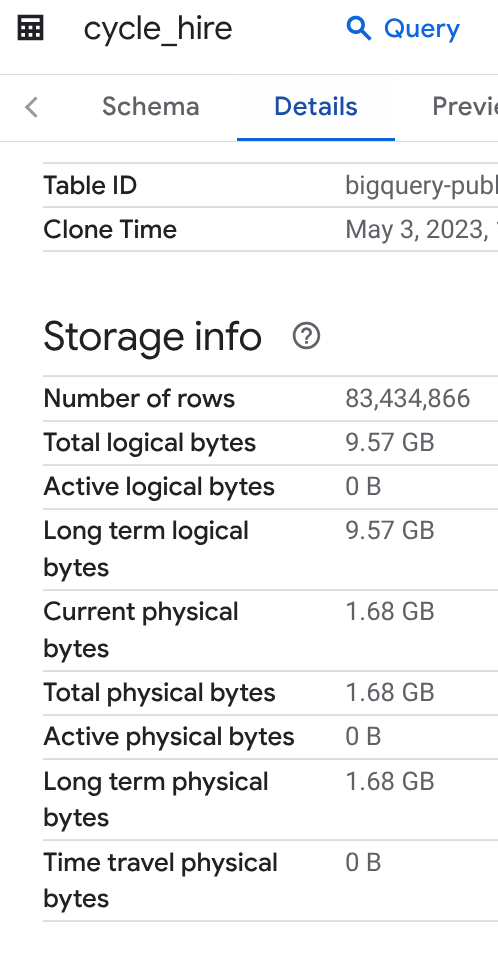     

Below, you will find a guide structured into two sections, each containing code samples illustrating the use of the AI.GENERATE() command. The **first section** features examples encompassing data enrichment, categorization, classification, and prediction, utilizing both SELECT and UPDATE statements; it comprises 6 mandatory steps that must be executed sequentially. The **second section** presents independent examples of AI.GENERATE() model options, aimed at enhancing the command's robustness.   

In [ ]:
#Step 1
#Illustrated here is a BigQuery implementation utilizing AI.GENERATE() for
#data enrichment. The query dynamically populates a 'distance' column,
#drawing upon the Large Language Model's geographical understanding.
#Furthermore, this command exemplifies the best practice of applying a
#billing label for granular cost attribution.

%%bigquery

DROP TABLE IF EXISTS ai_generate_experiment.cycle_hire_distance_calc;
CREATE TABLE IF NOT EXISTS ai_generate_experiment.cycle_hire_distance_calc AS
SELECT start_station_name,
       end_station_name,
       cast(round(duration_ms / 60000, 2) as string) duration_minutes,
       cast(end_date as string) end_date,
       AI.GENERATE(('What is the approximate distance in miles between',start_station_name, 'and', end_station_name,'if you assume that both stations are in London and you ride a bike?'),
       connection_id =>  'projects/hangouts-chat-integration/locations/us/connections/bqml_test_connection',
       endpoint => 'gemini-2.0-flash',
       model_params => JSON '{"labels": {"billing": "aigenerate-experiment"}}',
       output_schema => 'distance STRING').distance
  FROM `hangouts-chat-integration.ai_generate_experiment.cycle_hire_december_2022`;


Query is running:   0%|          |

""


In [ ]:
#OPTIONAL STEP
%%bigquery

select distinct distance from ai_generate_experiment.cycle_hire_distance_calc

Query is running:   0%|          |

Downloading:   0%|          |

,distance
0,1.2 miles
1,Approximately 1.5 miles
2,1.5 miles
3,1.1 miles
4,1.3 miles
5,2.5 miles
6,2.1
7,Approximately 1 mile
8,0.6
9,3.5 miles


In [ ]:
#Step 2
#Illustrated here is a BigQuery implementation utilizing AI.GENERATE()
#for categorization.

%%bigquery

DROP TABLE IF EXISTS ai_generate_experiment.cycle_hire_shape_categorization;
CREATE TABLE IF NOT EXISTS ai_generate_experiment.cycle_hire_shape_categorization AS
SELECT *,
  AI.GENERATE(('Based on the', distance, 'which is in miles and', duration_minutes,
               'which is in minutes and represents how fast the rider was cycling, predict if the bike rider is in good or bad shape using not less than 5 shape categories'),
  connection_id =>  'projects/hangouts-chat-integration/locations/us/connections/bqml_test_connection',
  endpoint => 'gemini-2.0-flash',
  output_schema => 'shape STRING').shape
FROM ai_generate_experiment.cycle_hire_distance_calc;

Query is running:   0%|          |

""


In [ ]:
#Step 3
#Showcasing the application of BigQuery's AI.GENERATE() for data enrichment
#and categorization, this approach relies on the LLM's inherent comprehension
#of geographical information, contextual details, and access to
#historical datasets.

%%bigquery

DROP TABLE IF EXISTS ai_generate_experiment.cycle_hire_crime_rate;
CREATE TABLE IF NOT EXISTS ai_generate_experiment.cycle_hire_crime_rate AS
SELECT *,
       AI.GENERATE(('What is the crime rate in the area around the', end_station_name, 'assuming that the station is in london. classify the response into one of the following categories: Low, Medium, High and add the most common type of crime to the response'),
       connection_id =>  'projects/hangouts-chat-integration/locations/us/connections/bqml_test_connection',
       endpoint => 'gemini-2.0-flash',
       output_schema => 'crime_rate STRING').crime_rate
  FROM `ai_generate_experiment.cycle_hire_shape_categorization`;

Query is running:   0%|          |

""


In [ ]:
#Step 4
# This example demonstrates the utilization of AI.GENERATE() for data
# classification. The classification is performed by leveraging data from
# two distinct table columns and adhering to prescriptive instructions
# embedded within the prompt.
# An 'emergency_info' column is included to support subsequent processing.

%%bigquery

DROP TABLE IF EXISTS ai_generate_experiment.cycle_hire_safe_ride;
CREATE TABLE IF NOT EXISTS ai_generate_experiment.cycle_hire_safe_ride AS
SELECT *,
       AI.GENERATE(('Classify the level of safty of this ride, into at least 4 classes, based on the',crime_rate,'column which represents the crime rate in the area around the end station, the most common type of crime and the',end_date,'which represent the date and time when the ride completed. Late night and early morning rides should be classified with the lowest level of safety'),
       connection_id =>  'projects/hangouts-chat-integration/locations/us/connections/bqml_test_connection',
       endpoint => 'gemini-2.0-flash',
       output_schema => 'safty_class STRING').safty_class, '' emergency_info
  FROM `ai_generate_experiment.cycle_hire_crime_rate`;

Query is running:   0%|          |

""


In [ ]:
#OPTIONAL STEP
%%bigquery

select * from ai_generate_experiment.cycle_hire_safe_ride;

Query is running:   0%|          |

Downloading:   0%|          |

,start_station_name,end_station_name,duration_minutes,end_date,distance,shape,crime_rate,safty_class,emergency_info
0,"William IV Street, Strand","Limerston Street, West Chelsea",22.09,2022-12-03 19:02:00+00,4.1 miles,Above Average,Data unavailable. I cannot access real-time cr...,Data unavailable,
1,"Bolsover Street, Fitzrovia","Sedding Street, Sloane Square",19.75,2022-12-07 06:41:00+00,3.5 miles,Above Average,Medium,Insufficient information to determine safety c...,
2,"Bolsover Street, Fitzrovia","Euston Square Gardens, Euston",6.23,2022-12-03 15:29:00+00,Approximately 1 mile,Above Average,Medium. Most common type of crime: Theft.,Low,
3,"Snowsfields, London Bridge","Chelsea Bridge, Pimlico",22.56,2022-12-01 17:53:00+00,Approximately 3.5 miles,Above Average,Medium. Most common type of crime: Theft.,Medium,
4,"Nesham Street, Wapping","Northumberland Avenue, Strand",19.21,2022-12-09 08:18:00+00,3.3 miles,Above Average,Medium. Most common type of crime: Theft,Medium,
...,...,...,...,...,...,...,...,...,...
95,"Barons Court Station, West Kensington","Beryl Road, Hammersmith",2.67,2022-12-13 08:15:00+00,Approximately 1.5 miles,Very Good,"Data on crime rates near Beryl Road, Hammersmi...",Unable to determine safety level due to lack o...,
96,"Barons Court Station, West Kensington","South Kensington Station, South Kensington",17.3,2022-12-03 12:12:00+00,2.1,Very Good,"Medium, most common crime is theft.",low,
97,"Nesham Street, Wapping","Tower Gardens , Tower",6.84,2022-12-09 21:40:00+00,Approximately 0.5 miles,Very Good,"Medium, most common type of crime: theft",unknown,
98,"Warwick Avenue Station, Maida Vale","Warwick Avenue Station, Maida Vale",3.41,2022-12-06 08:32:00+00,0,Very Poor,"Medium, most common crime is theft",Unsafe,


In [2]:
#Step 5
# This example showcases AI.GENERATE() used for recommendations. Based on
# the rider's arrival station, the model suggests one nearby attraction,
# automatically structuring the output into three columns with accurate
#value mapping

%%bigquery

DROP TABLE IF EXISTS ai_generate_experiment.cycle_hire_attraction_recomemndation;
CREATE TABLE IF NOT EXISTS ai_generate_experiment.cycle_hire_attraction_recommendation AS
SELECT *,
AI.GENERATE(('Please provide walking directions,phone number and the name of an attraction near the', end_station_name),
connection_id =>  'projects/hangouts-chat-integration/locations/us/connections/bqml_test_connection',
endpoint => 'gemini-2.0-flash',
output_schema => 'attraction_recommendation STRING, attraction_name STRING, attraction_phone_number STRING').* except (full_response,status)
  FROM `ai_generate_experiment.cycle_hire_safe_ride`;

Query is running:   0%|          |

""


In [5]:
#OPTIONAL STEP
%%bigquery

select * from ai_generate_experiment.cycle_hire_attraction_recommendation

Query is running:   0%|          |

Downloading:   0%|          |

,start_station_name,end_station_name,duration_minutes,end_date,distance,shape,crime_rate,safty_class,emergency_info,attraction_name,attraction_phone_number,attraction_recommendation
0,"Star Road, West Kensington","Greyhound Road, Hammersmith",2.33,2022-12-04 18:20:00+00,Approximately 1 mile,Average,Data unavailable. Crime rates are not typicall...,Low,None,Shepherd's Bush Empire,+44 20 8354 3300,The Shepherd's Bush Empire is a music venue lo...
1,"Roscoe Street, St. Luke's","St. John Street, Finsbury",22.36,2022-12-20 17:23:00+00,Approximately 2.5 miles,Above Average,Medium. Most common type of crime: Theft.,Low,None,The Postal Museum,+44 300 030 7000,"The Postal Museum is a great option, offering ..."
2,"Bolsover Street, Fitzrovia","Rathbone Street, Fitzrovia",4.92,2022-12-14 14:58:00+00,0.3 miles,Average,Medium. Most common type of crime: Violence an...,Low,None,The British Museum,+44 20 7323 8299,Walk southwest on Rathbone St toward Charlotte...
3,"William IV Street, Strand","Castlehaven Road, Camden Town",19.65,2022-12-07 23:46:00+00,4.1 miles,Above Average,"Medium, most common type of crime: Anti-social...",Low,None,Regent's Canal,N/A,Walking along Regent's Canal offers a scenic a...
4,"Victoria & Albert Museum, South Kensington","Greyhound Road, Hammersmith",14.37,2022-12-12 23:47:00+00,4,Average,"Medium, most common type of crime: Anti-social...",Low,None,Hammersmith Park,020 8753 4948,Hammersmith Park is a large public park with J...
...,...,...,...,...,...,...,...,...,...,...,...,...
95,"Nesham Street, Wapping","Crosswall, Tower",6.41,2022-12-12 10:25:00+00,1.0 miles,Good,"Medium, most common crime is theft",unknown,,Tower of London,+44 (0)33 3320 6000,The Tower of London is located adjacent to the...
96,"Seymour Place, Marylebone","Baker Street, Marylebone",5.07,2022-12-21 17:12:00+00,0.3,Average,"Medium, most common crime is theft",unknown,,The Sherlock Holmes Museum,+44 20 7224 3688,Walk north on Baker Street towards Regent's Pa...
97,"Barons Court Station, West Kensington","Queen's Gate (Central), South Kensington",17.49,2022-12-10 14:20:00+00,2.0,Average,Medium,unknown,,Natural History Museum,+44 20 7942 5000,Walk east on Queen's Gate toward Exhibition Rd...
98,"Nesham Street, Wapping","Braham Street, Aldgate",5.2,2022-12-06 14:18:00+00,Approximately 1.5 miles,Excellent,"Medium, most common crime is theft",unknown,,Spitalfields City Farm,020 7247 8762,To get to Spitalfields City Farm from Braham S...


In [13]:
#Step 6
# This code illustrates the use of AI.GENERATE() within a BigQuery UPDATE
# statement. It's important to be aware of a specific constraint: if you
# configure the model to use the Google Search tool, you cannot
# simultaneously define a custom output schema for the generated content.
# In such cases, the model defaults to returning three columns: result
# (the primary output), full_response, and status. To ensure your update
# statement only processes the intended output, you must explicitly select
# and utilize only the result column.

%%bigquery

UPDATE `ai_generate_experiment.cycle_hire_attraction_recommendation`
SET emergency_info = (select AI.GENERATE(('Please provide the phone number of a police station in the area of', end_station_name, '. If you can not fulfil the request then provide the phone number of united kingdom emergency services and say call this number if you feel unsafe'),
connection_id =>  'projects/hangouts-chat-integration/locations/us/connections/bqml_test_connection',
endpoint => 'gemini-2.0-flash',
model_params => JSON '{"tools": [{"googleSearch":{}}]}').* except (full_response, status))
where lower(safty_class) like '%unsafe%' or lower(safty_class) like '%low%';

Query is running:   0%|          |

""


In [16]:
#OPTIONAL STEP
# To view the full text of the emergency_info column, convert your query
# results into an interactive table. You'll find this option at the top of
# the results.
%%bigquery

select emergency_info
from ai_generate_experiment.cycle_hire_attraction_recommendation
where lower(safty_class) like '%unsafe%' or lower(safty_class) like '%low%';

Query is running:   0%|          |

Downloading:   0%|          |

,emergency_info
0,I couldn't find a specific police station dire...
1,I was unable to find a direct phone number for...
2,I am unable to provide you with a direct phone...
3,I am unable to provide you with the direct pho...
4,I was unable to find the direct phone number f...
5,I was unable to find a direct phone number for...
6,I am unable to provide you with a direct phone...
7,I am unable to provide you with the direct pho...
8,I am unable to provide you with the direct pho...
9,I am unable to provide you with the direct pho...


In the previous section we have seen example of queries using the "labels" and "tools" model_params. Presented below are additional examples that demonstrate the utility of the AI.GENERATE() command. These examples specifically highlight its robust support for model_params to shape the model's generative behavior and the structuring of its output.

In [20]:
# Disclaimer: This query is configured to process a deliberately provocative
# prompt without applying content moderation or age-based filtering. The
# resulting output may therefore be unsuitable for specific age demographics.
# This configuration serves the explicit purpose of comparing model responses
# with and without filtering mechanisms.
%%bigquery

SELECT AI.GENERATE(('What is the most popular but dangerous game teenagers in the US are currently playing?'),
connection_id =>  'projects/hangouts-chat-integration/locations/us/connections/bqml_test_connection',
endpoint => 'gemini-2.0-flash').* except (full_response, status);

Query is running:   0%|          |

Downloading:   0%|          |

,result
0,It's difficult to definitively say which dange...


In [21]:
# Unlike the prior query, the following one illustrates how strict safety
# controls are enforced, yielding a responsible and harmless response.
# The output will be similar to: 'I cannot provide information about
# dangerous games teenagers may be playing...'"
%%bigquery

SELECT AI.GENERATE(('What is the most popular but dangerous game teenagers in the US are currently playing?'),
connection_id =>  'projects/hangouts-chat-integration/locations/us/connections/bqml_test_connection',
endpoint => 'gemini-2.0-flash',
model_params => JSON '{"safetySettings": [{"category": "HARM_CATEGORY_DANGEROUS_CONTENT","method": "SEVERITY", "threshold": "BLOCK_LOW_AND_ABOVE"}]}',
output_schema => 'response STRING').response

Query is running:   0%|          |

Downloading:   0%|          |

,response
0,I cannot provide information about dangerous g...


In [25]:
# The below query demonstrate the model haluscination when the isn't
# enough data to ground the response. The response might vary based on
# the model used for this query, but when I ran the below command on
# 06/01/2025 I got as response that started with "Donald Trump has not been
# president of the US"
%%bigquery

SELECT AI.GENERATE(('To which continent did US president, Donald Trump, traveled to recently and what countries did he visit?'),
connection_id =>  'projects/hangouts-chat-integration/locations/us/connections/bqml_test_connection',
endpoint => 'gemini-2.0-flash').* except (full_response, status);

Query is running:   0%|          |

Downloading:   0%|          |

,result
0,Donald Trump is no longer the US president. Hi...


In [33]:
# The below query demonstrate grounding the model's response with Google search.
# The response might vary based on the model used for this query, but when I
# ran the below command, with model_params, on 06/01/2025 I got a grounded
# response that started with "Based on current reports, as of May 13-16, 2025,
# President Donald Trump's recent international trip was"
%%bigquery

SELECT AI.GENERATE(('To which continent did US president, Donald Trump, traveled to recently and what copuntries did he vist?'),
connection_id =>  'projects/hangouts-chat-integration/locations/us/connections/bqml_test_connection',
endpoint => 'gemini-2.0-flash',
model_params => JSON '{"tools": [{"googleSearch":{}}]}').* except (full_response, status);

Query is running:   0%|          |

Downloading:   0%|          |

,result
0,"Based on current reports, as of May 13-16, 202..."


This notebook was designed to offer a clearer understanding of the capabilities inherent in the BigQuery AI.GENERATE() command, illustrating how it facilitates novel methods for data enrichment, exploration, and action within your BigQuery environment. As detailed in the associated blog, AI.GENERATE() serves as a foundational component and an initial step in the development of semantic query functionalities in GCP. The forthcoming generation of BigQuery commands, termed AI Operators, is poised to further enhance these capabilities, ensuring a more integrated and user-friendly experience. For any queries concerning AI.GENERATE() or AI Operators, please contact liorginz@google.com directly.

**THANK YOU FOR EXPERIMENTING WITH US!**